In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cic_asymptotics.dgps import ExponentialDGP, GaussianDGP, LimitCaseDGP
from cic_asymptotics.empirical_cdf import smoothed_empirical_cdf
from cic_asymptotics.density_estimation import kernel_density_estimator_for_u, kernel_density_estimator, rectangular_kernel, gaussian_kernel

# Exponential DGP

True value of theta: 0.1429


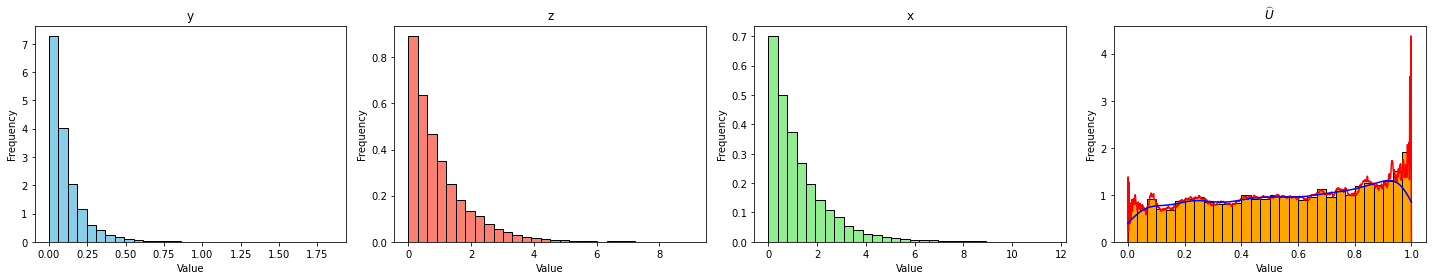

In [ ]:
dgp = ExponentialDGP(n=10_000)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_for_u(x_, u_hat)
f_hat_2 = kernel_density_estimator(x_, u_hat)


BINS = 30

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot histograms
ax[0].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[0].set_title('y')

ax[1].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[1].set_title('z')

ax[2].hist(x, bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[2].set_title('x')

ax[3].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[3].plot(x_, f_hat, color='red')
ax[3].plot(x_, f_hat_2, color='blue')
ax[3].set_title(r'$\widehat U$')


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Gaussian DGP

True value of theta: 1.0000


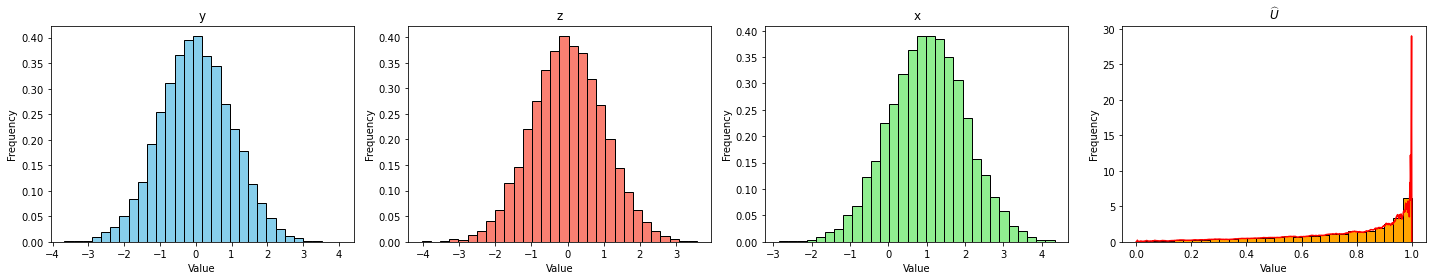

In [3]:
dgp = GaussianDGP(n=10_000)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_for_u(x_, u_hat)


BINS = 30

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot histograms
ax[0].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[0].set_title('y')

ax[1].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[1].set_title('z')

ax[2].hist(x, bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[2].set_title('x')

ax[3].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[3].plot(x_, f_hat, color='red')
ax[3].set_title(r'$\widehat U$')


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Limit case DGP

True value of theta: 0.1041


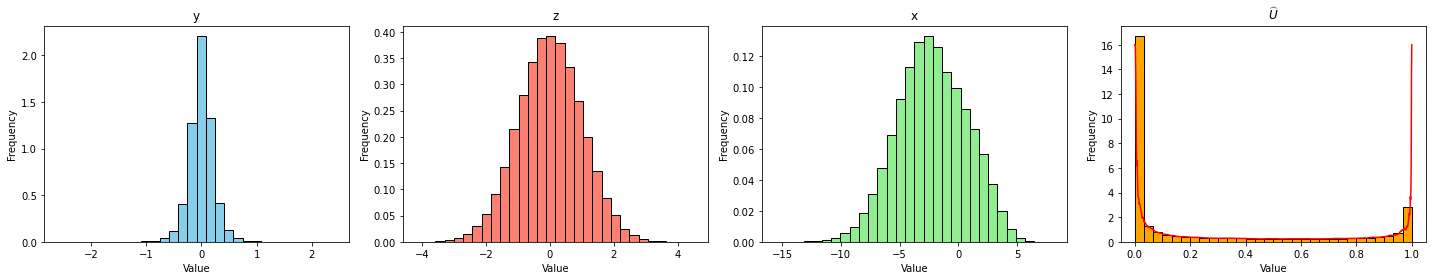

In [4]:
dgp = LimitCaseDGP(n=100_000, b1 = 0.1, b2=0.3, d1=0.1, d2=0.1)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_for_u(x_, u_hat)


BINS = 30

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot histograms
ax[0].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[0].set_title('y')

ax[1].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[1].set_title('z')

ax[2].hist(np.clip(x, a_min=-np.inf, a_max=10), bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[2].set_title('x')

ax[3].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[3].plot(x_, np.clip(f_hat, a_min=0, a_max=16), color='red')
ax[3].set_title(r'$\widehat U$')


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()